In [1]:
import cv2 as cv
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
img = cv.imread('./data/boards/circular/lkQsT.jpg', 0)
img = cv.medianBlur(img,5)

In [3]:
ret,th1 = cv.threshold(img,64,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv.THRESH_BINARY_INV,11,2)

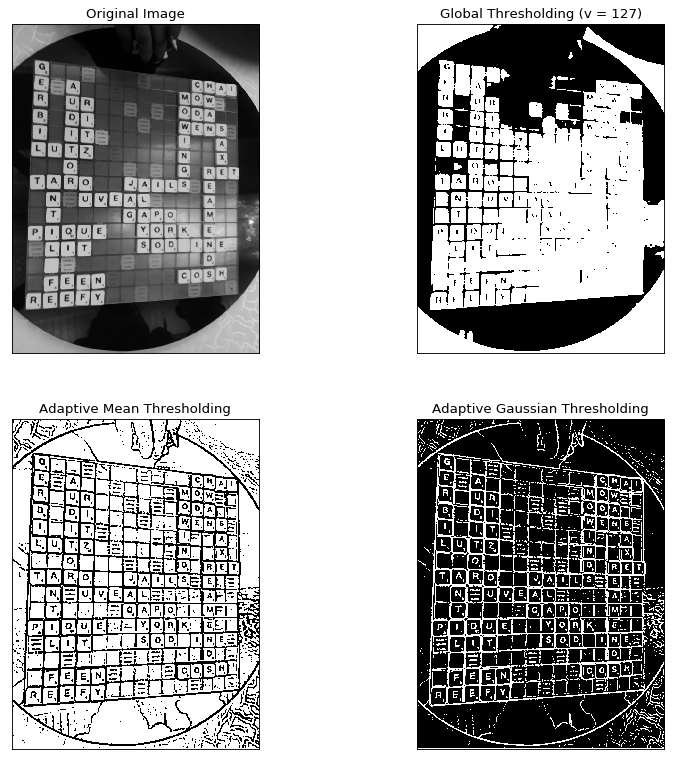

In [4]:
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.figure(figsize=(12, 12), dpi=80)
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
# plt.show()

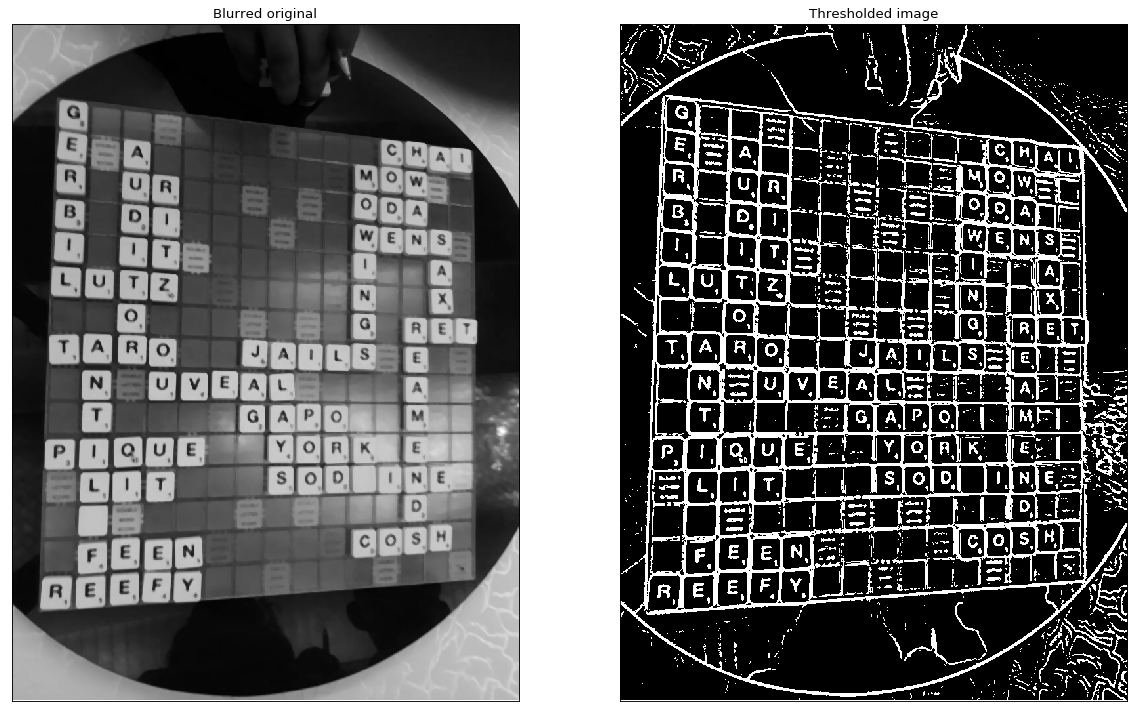

In [5]:
kernel = np.ones((5,5),np.uint8)

# Erode:
# opening = cv.erode(th3, kernel) 
# opening = cv.morphologyEx(th3, cv.MORPH_OPEN, kernel)

plt.figure(figsize=(18, 16), dpi=80)
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Blurred original'), plt.xticks([]), plt.yticks([])

plt.subplot(122), plt.imshow(th3, cmap='gray')
plt.title('Thresholded image'), plt.xticks([]), plt.yticks([])

plt.show()

how many lines 275 (275, 1, 4)


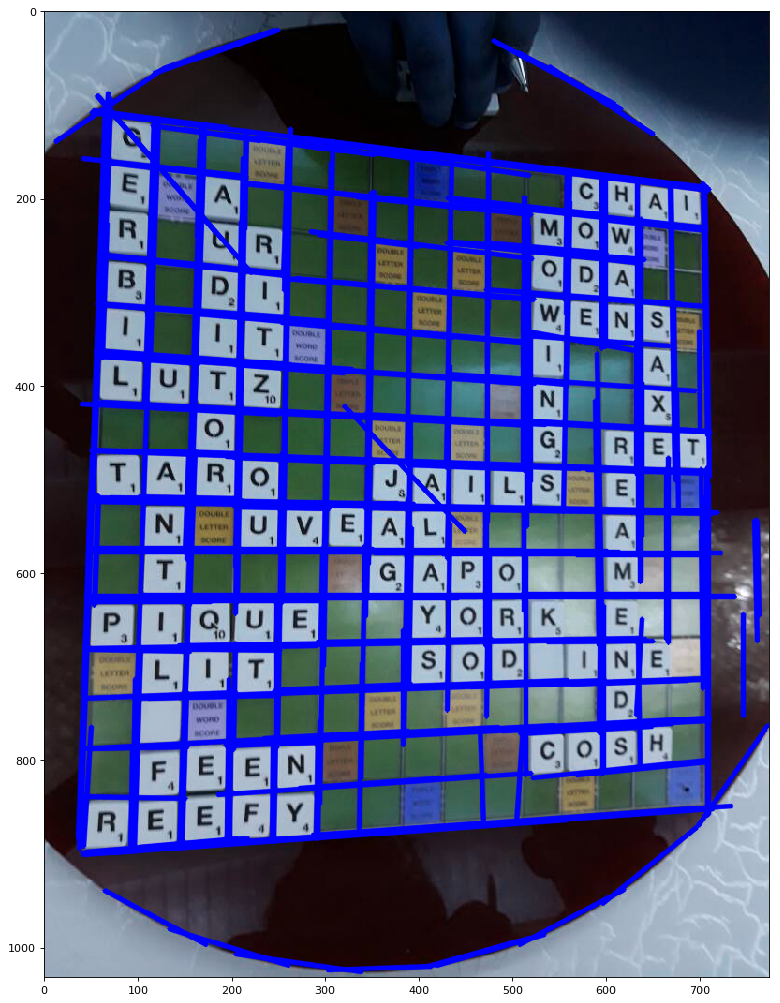

In [6]:
minLineLength = 100
maxLineGap = 10
import math
img = cv.imread('./data/boards/circular/lkQsT.jpg')

# lines = cv.HoughLines(opening, 1, np.pi/180, 1000)

lines = cv.HoughLinesP(th3, 1, math.pi/180.0, 40, np.array([]), minLineLength, maxLineGap)
print('how many lines', len(lines), lines.shape)

a,b,c = lines.shape
for i in range(a):
    cv.line(img, (lines[i][0][0], lines[i][0][1]), (lines[i][0][2], lines[i][0][3]), (0, 0, 255), 3, cv.LINE_AA)

plt.figure(figsize=(18, 16), dpi=80)
plt.imshow(img)